In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import time

# SiPM-2 from FBK calibration

SiPM 2 with 30.0  V, Number of values: 53989
PE 7 at 3.81 +/- 0.02 ADC x us
PE 8 at 4.25 +/- 0.01 ADC x us
SiPM 2 with 30.5  V, Number of values: 102039
PE 4 at 3.68 +/- 0.00 ADC x us
PE 5 at 4.38 +/- 0.00 ADC x us
PE 6 at 5.06 +/- 0.01 ADC x us
PE 7 at 5.76 +/- 0.01 ADC x us
SiPM 2 with 31.0  V, Number of values: 150473
PE 3 at 3.39 +/- 0.01 ADC x us
PE 4 at 4.18 +/- 0.01 ADC x us
PE 5 at 5.00 +/- 0.00 ADC x us
PE 6 at 5.84 +/- 0.01 ADC x us
PE 7 at 6.65 +/- 0.01 ADC x us
PE 8 at 7.50 +/- 0.01 ADC x us
PE 9 at 8.37 +/- 0.01 ADC x us
SiPM 2 with 31.5  V, Number of values: 179765
PE 3 at 3.70 +/- 0.01 ADC x us
PE 4 at 4.69 +/- 0.01 ADC x us
PE 5 at 5.65 +/- 0.00 ADC x us
PE 6 at 6.61 +/- 0.01 ADC x us
PE 7 at 7.58 +/- 0.01 ADC x us
PE 8 at 8.58 +/- 0.01 ADC x us
PE 9 at 9.54 +/- 0.01 ADC x us
PE 10 at 10.47 +/- 0.03 ADC x us
SiPM 2 with 32.0  V, Number of values: 213458
PE 3 at 4.09 +/- 0.01 ADC x us
PE 4 at 5.20 +/- 0.01 ADC x us
PE 5 at 6.33 +/- 0.01 ADC x us
PE 6 at 7.43 +/- 0.01 ADC

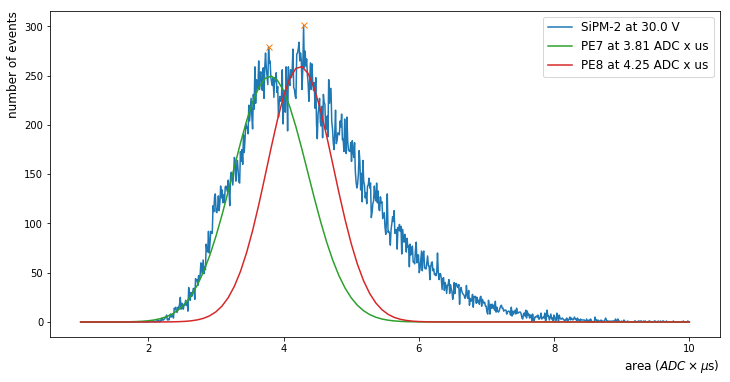

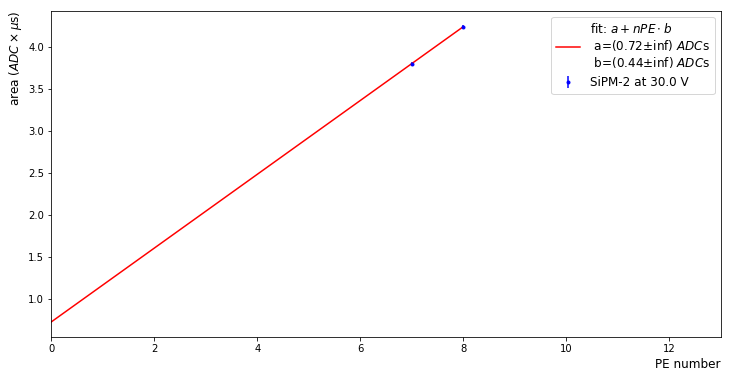

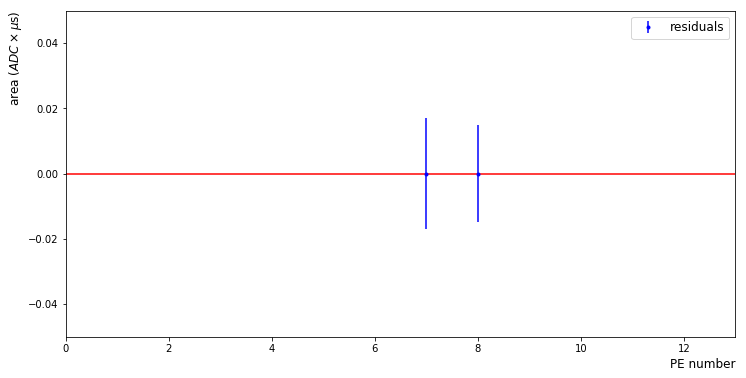

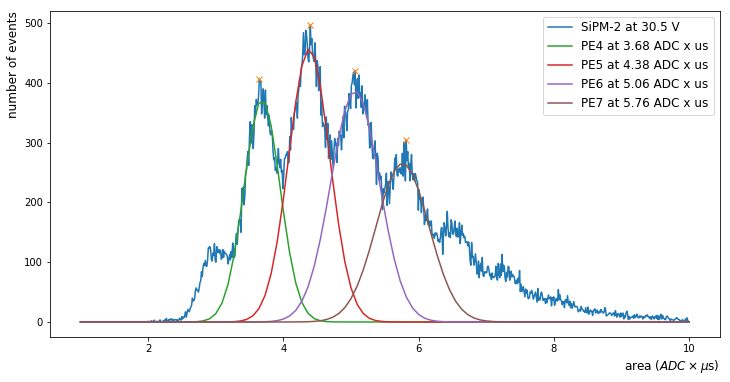

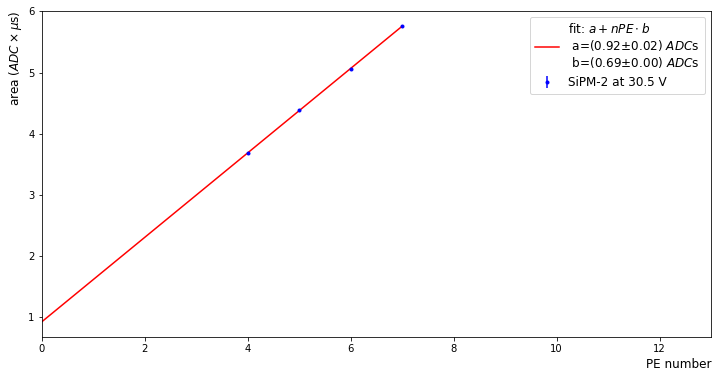

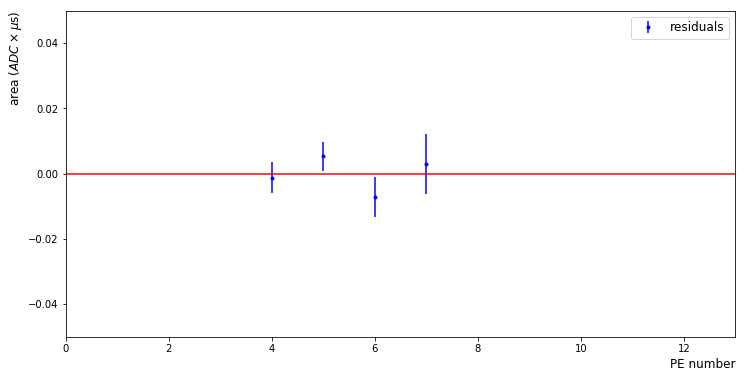

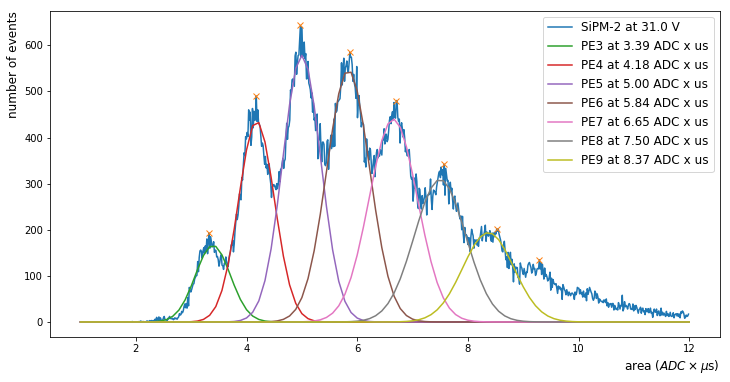

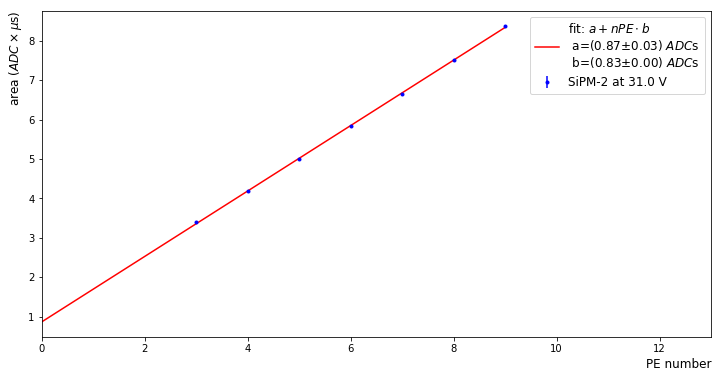

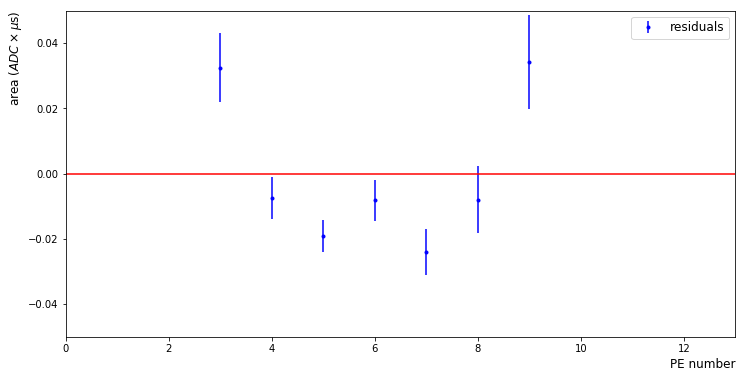

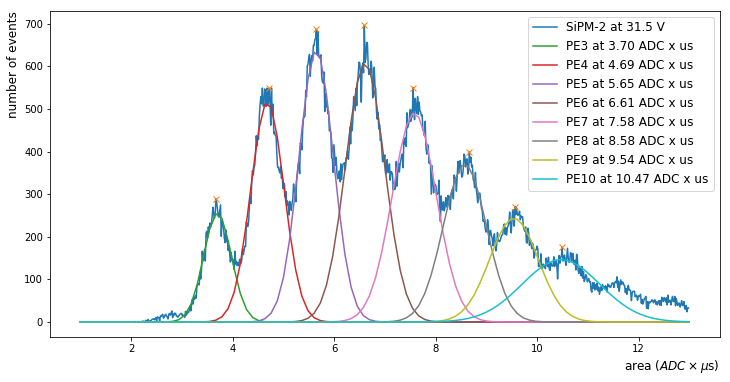

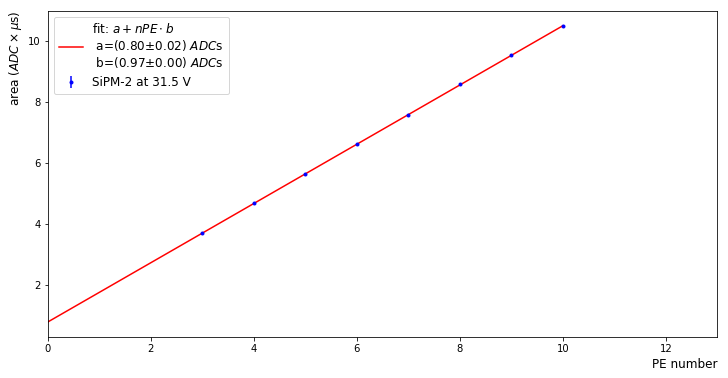

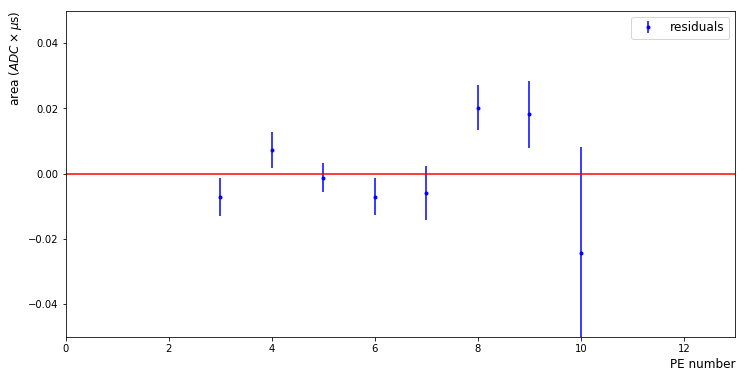

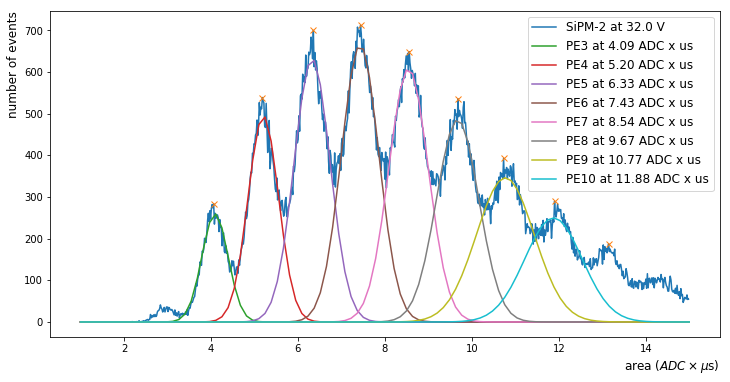

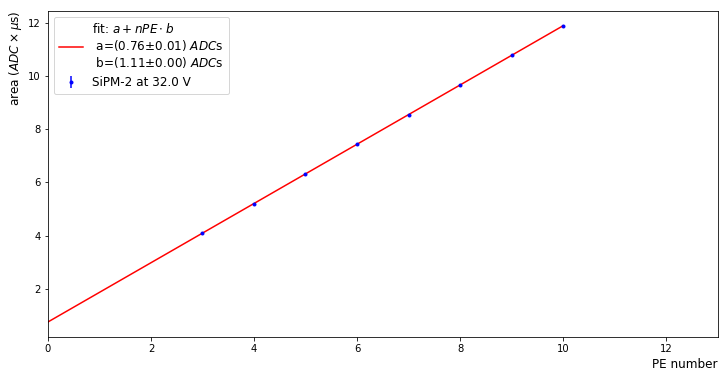

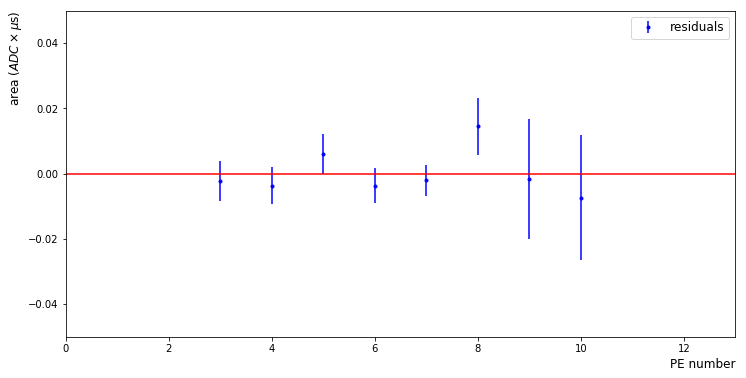

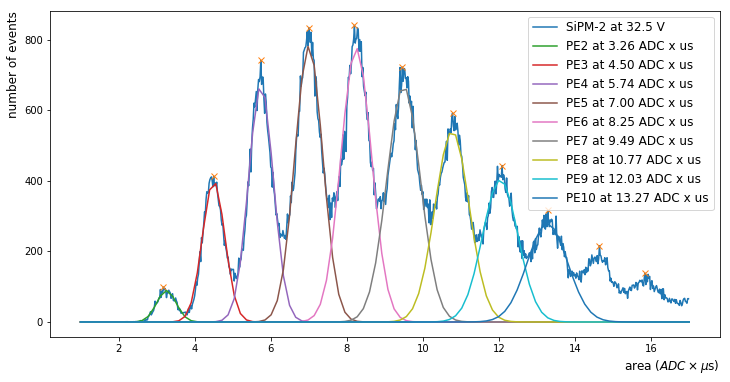

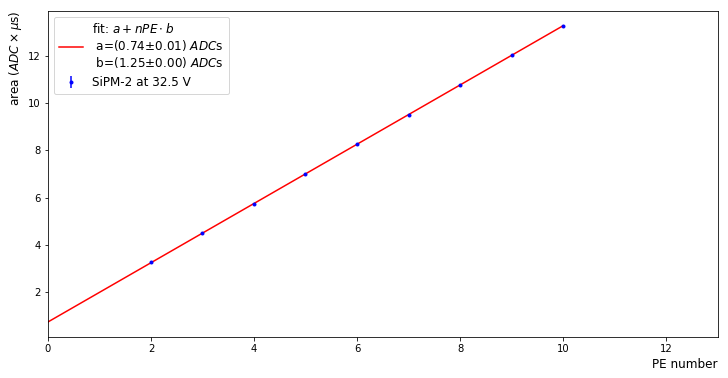

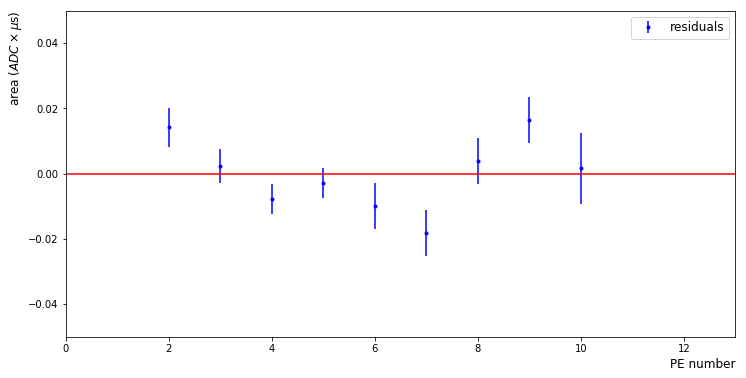

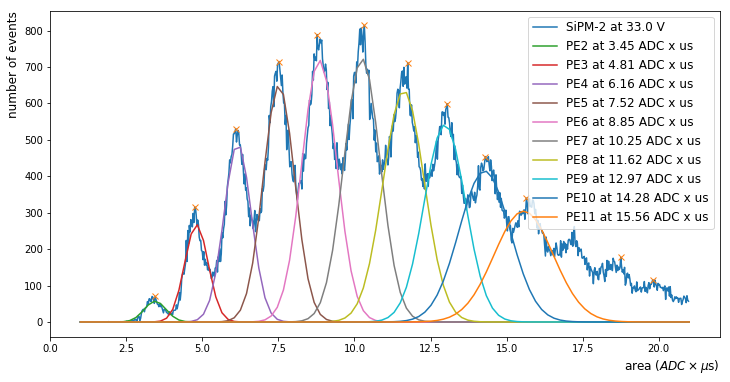

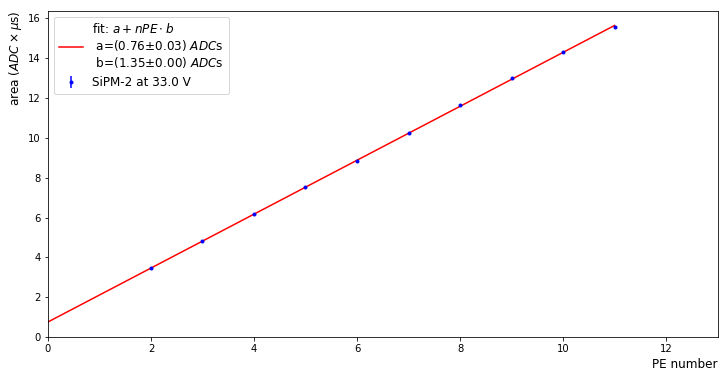

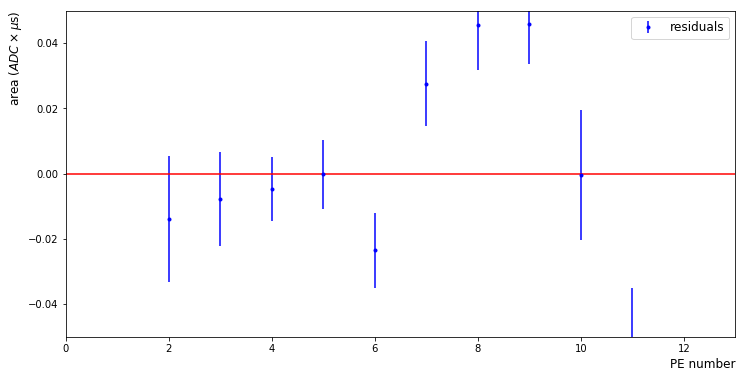

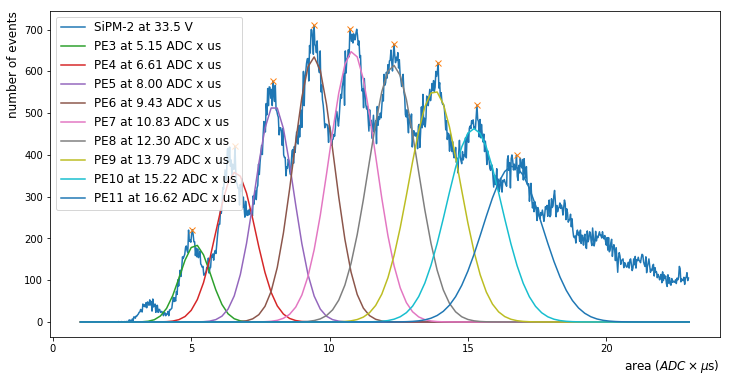

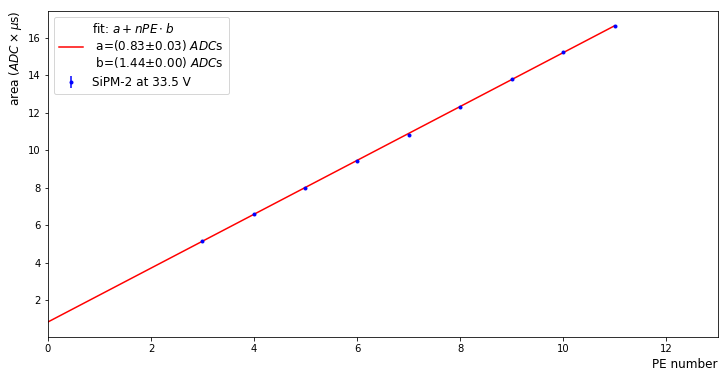

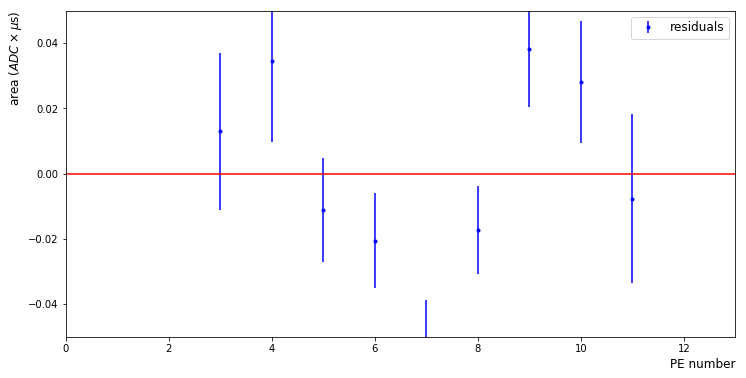

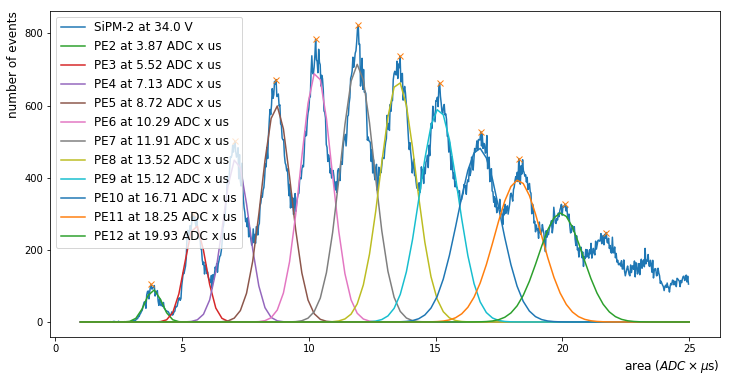

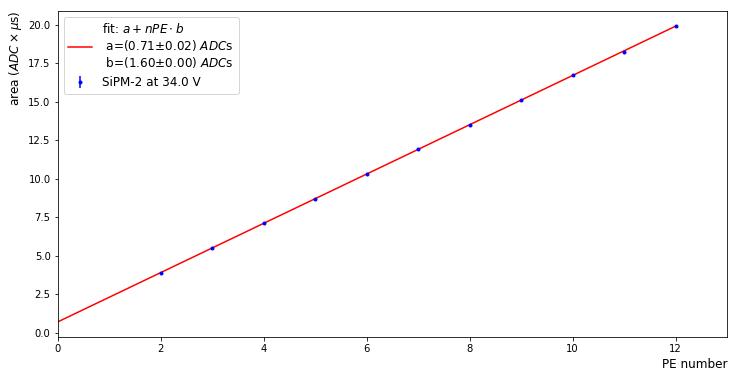

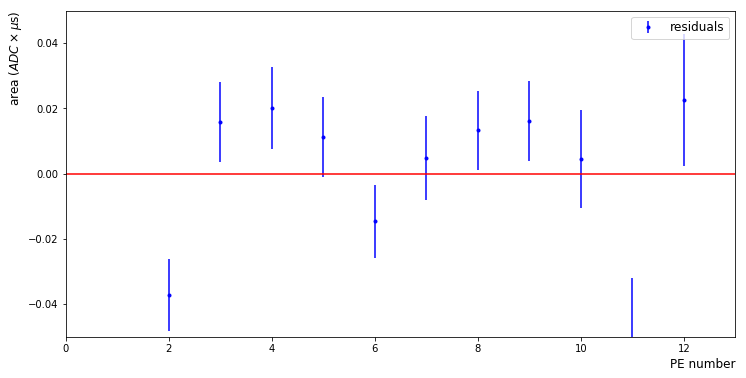

In [4]:
par = []
par_err = []
pe = []
pe_err = []
n_peaks = []
voltages = np.arange(30,34.1,0.5)
nsipm = 2
#first_pe = [8,5,4,3,3,2,2,3,2]
first_pe = [7,4,3,3,3,2,2,3,2]
#first_pe = [8,5,4,4,4,3,3,4,3]
last_pe = [9,9,9,10,10,10,11,11,12]
area_lim = [10,10,12,13,15,17,21,23,25]
for i in range(9):
    p, p_err, npeaks, pp, pp_err = psu.process_pe_spectrum(nsipm,voltages[i], first_pe[i],
                                                           last_pe[i],area_lim[i], 800, 70, 13, 0.05)
    par.append(p), par_err.append(p_err), n_peaks.append(npeaks), pe.append(pp), pe_err.append(pp_err)

  $30.0$  |  $53989$  |  $0.72 \pm inf$  |  $0.440 \pm inf$  |
  $30.5$  |  $102039$  |  $0.92 \pm 0.02$  |  $0.691 \pm 0.003$  |
  $31.0$  |  $150473$  |  $0.87 \pm 0.03$  |  $0.829 \pm 0.005$  |
  $31.5$  |  $179765$  |  $0.80 \pm 0.02$  |  $0.970 \pm 0.002$  |
  $32.0$  |  $213458$  |  $0.76 \pm 0.01$  |  $1.113 \pm 0.001$  |
  $32.5$  |  $227378$  |  $0.74 \pm 0.01$  |  $1.253 \pm 0.002$  |
  $33.0$  |  $242997$  |  $0.76 \pm 0.03$  |  $1.351 \pm 0.004$  |
  $33.5$  |  $250155$  |  $0.83 \pm 0.03$  |  $1.436 \pm 0.004$  |
  $34.0$  |  $257867$  |  $0.71 \pm 0.02$  |  $1.600 \pm 0.003$  |


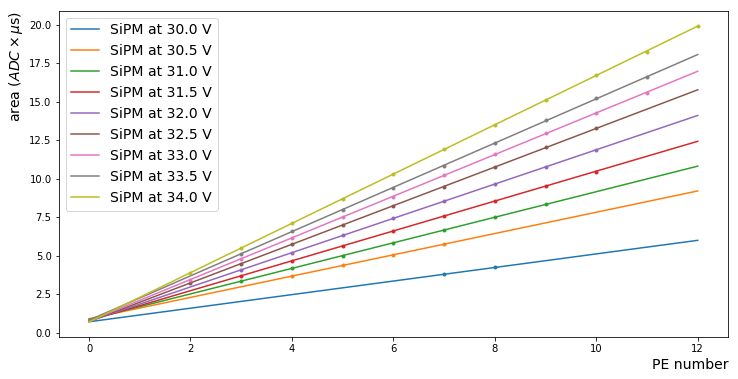

In [6]:
plt.figure(figsize=(12,6))
x = range(0,13)
for i in range(len(par)):
    print(f'  ${voltages[i]}$  |  ${n_peaks[i]}$  |  ${par[i][0]:.2f} \pm {par_err[i][0]:.2f}$  |  ${par[i][1]:.3f} \pm {par_err[i][1]:.3f}$  |')
    p = plt.plot(x,psu.retta(x,par[i][0],par[i][1]),label=f'SiPM at {voltages[i]} V')
    pes = np.arange(first_pe[i],len(pe[i])+first_pe[i])
    plt.errorbar(pes, pe[i], yerr=pe_err[i],color = p[0].get_color(),marker='.',linestyle='')
plt.ylabel(r'area ($ADC\times \mu$s)',ha='right',y=1,fontsize=14)
plt.xlabel('PE number',ha='right',x=1,size=40,fontsize=14)
plt.legend(fontsize=14)

## SiPM2 acquisition on 11 November 2020

SiPM 2 with 34.0  V, Number of values: 222438
PE 1 at 2.41 +/- 0.00 ADC x us
PE 2 at 4.02 +/- 0.00 ADC x us
PE 3 at 5.66 +/- 0.01 ADC x us
PE 4 at 7.29 +/- 0.01 ADC x us
PE 5 at 8.93 +/- 0.01 ADC x us
PE 6 at 10.56 +/- 0.01 ADC x us
PE 7 at 12.21 +/- 0.01 ADC x us
PE 8 at 13.85 +/- 0.01 ADC x us
PE 9 at 15.49 +/- 0.02 ADC x us
PE 10 at 17.12 +/- 0.02 ADC x us
PE 11 at 18.79 +/- 0.02 ADC x us
PE 12 at 20.44 +/- 0.02 ADC x us


(array([0.73824917, 1.63974404]),
 array([0.01018504, 0.00138388]),
 222438,
 [2.405356761171325,
  4.018044869455186,
  5.660088205594039,
  7.293538232126008,
  8.926067915834528,
  10.559823931419979,
  12.206078811280326,
  13.8495839783083,
  15.48937756652649,
  17.11730522129252,
  18.789875009988144,
  20.443884417486768],
 [0.0029638279597897685,
  0.0038274441718249997,
  0.006227921594500397,
  0.008609273033476543,
  0.010194998869485362,
  0.0106739311311598,
  0.010883648876424826,
  0.013316456990813222,
  0.016152236276413035,
  0.01975843275891776,
  0.01760454951625747,
  0.02286281841453519])

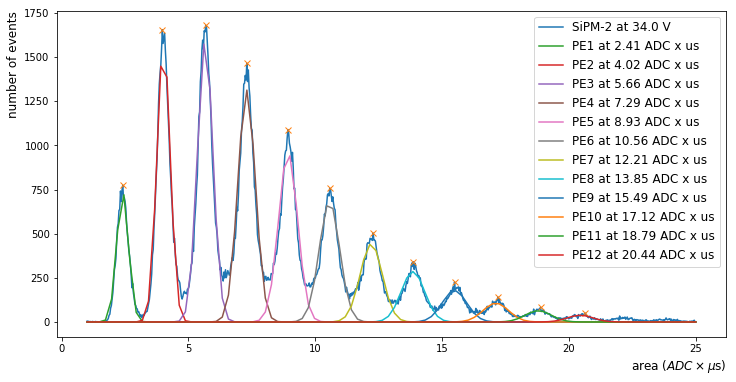

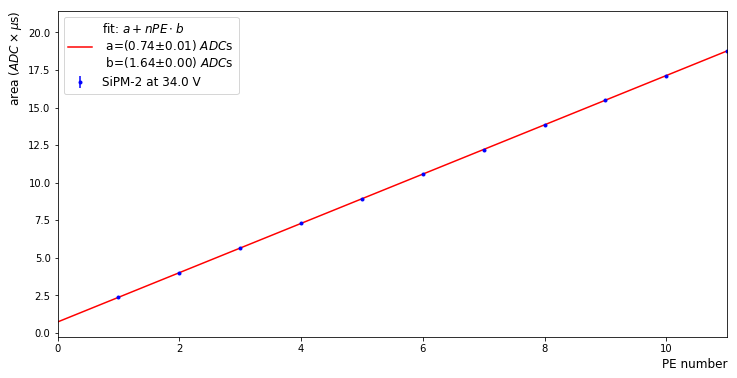

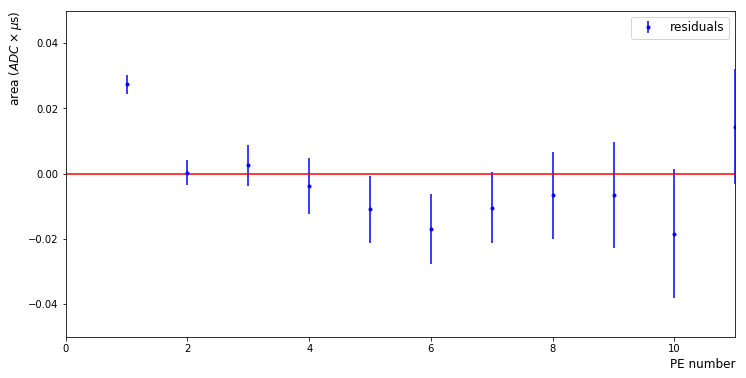

In [8]:
psu.process_pe_spectrum(nsipm,voltages[-1], 1,last_pe[-1],area_lim[-1], 800, 10, 11, 0.05,'2020_11_20')